In [6]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

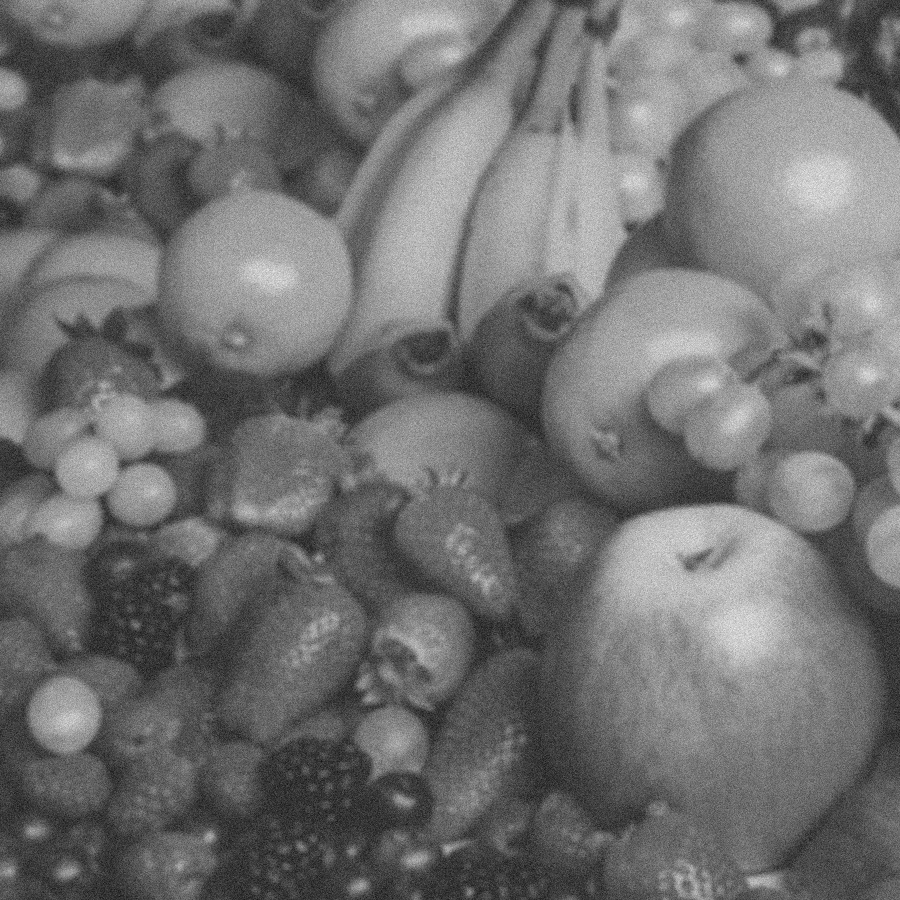

True

In [7]:
#original
original = cv2.imread('fruit blurred-noisy.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(original)
cv2.imwrite('original.jpg', original)

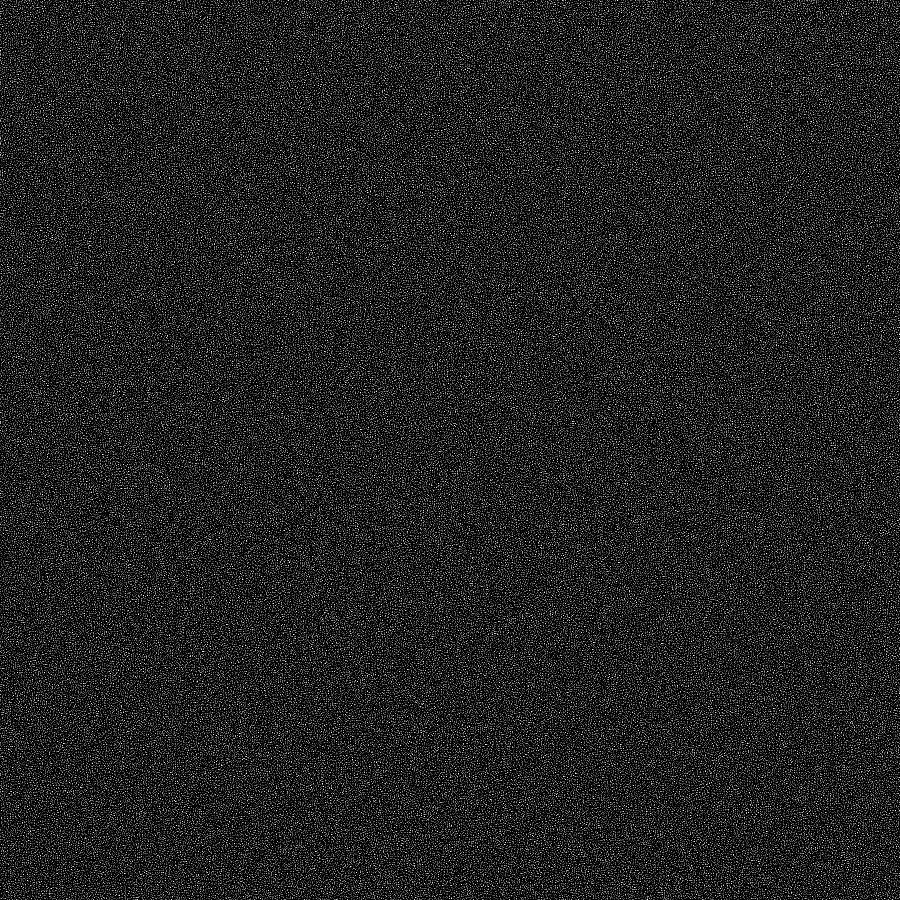

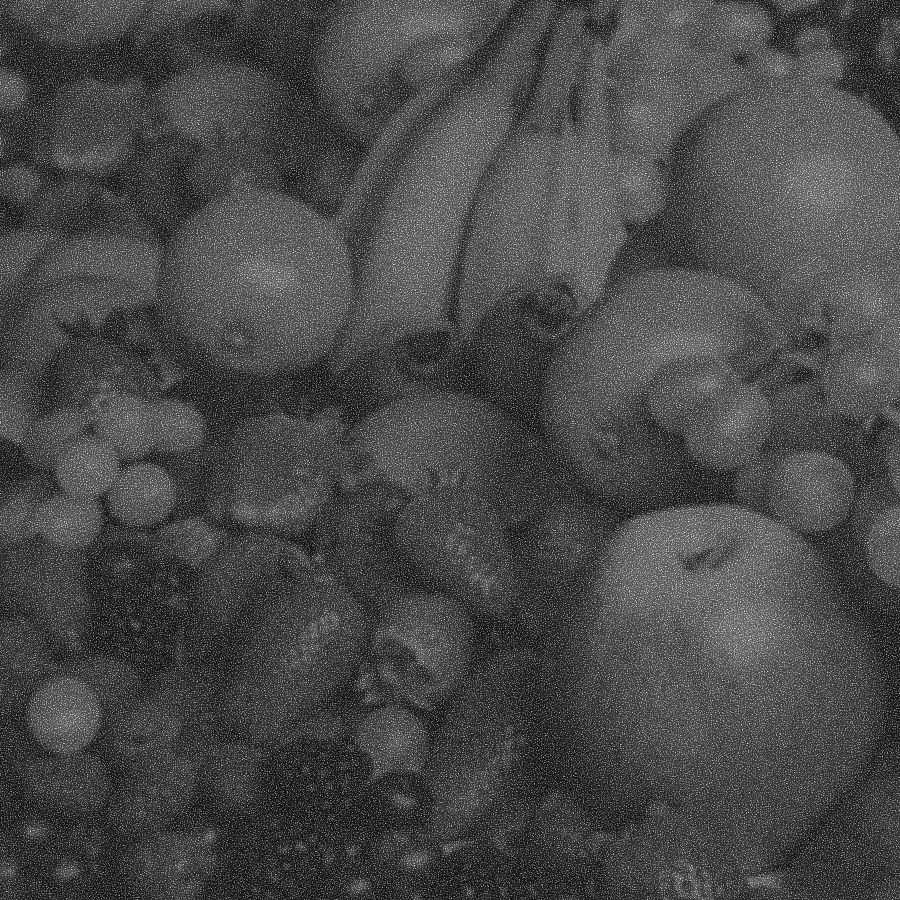

In [8]:
#Laplacian
kernel = np.array([[-1, -1, -1],
          [-1, 8, -1],
          [-1, -1, -1]])
Laplacian = cv2.filter2D(original, ddepth=-1, kernel=kernel)
cv2_imshow(np.abs(Laplacian))

#Laplacian sharpen
Laplacian_sharpen = cv2.addWeighted(original, 0.5, Laplacian,0.5,0)
cv2_imshow(Laplacian_sharpen)

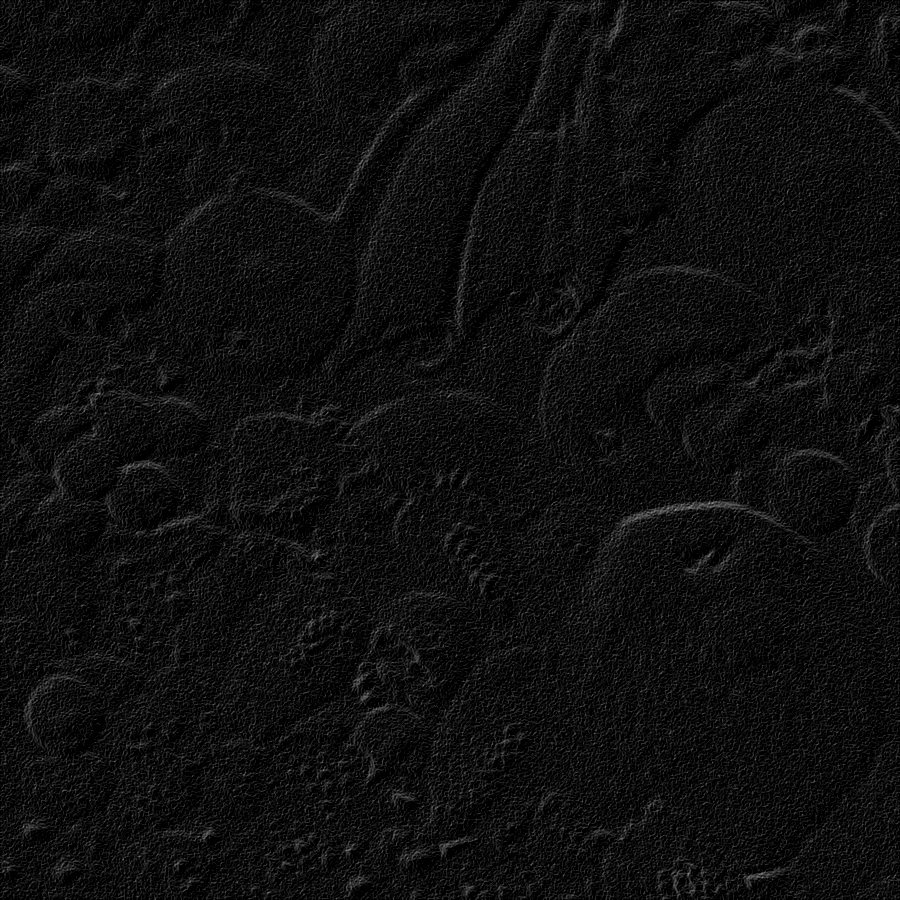

In [9]:
#Sobel gradient
kernel = np.array([[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]])
gy = cv2.filter2D(original, ddepth=-1, kernel=kernel)

kernel = np.array([[-1, -2, -1],
          [0, 0, 0],
          [1, 2, 1]])

gx = cv2.filter2D(original, ddepth=-1, kernel=kernel)

Sobel_gradient = cv2.addWeighted(gx, 0.5, gy,0.5,0)
cv2_imshow(Sobel_gradient)

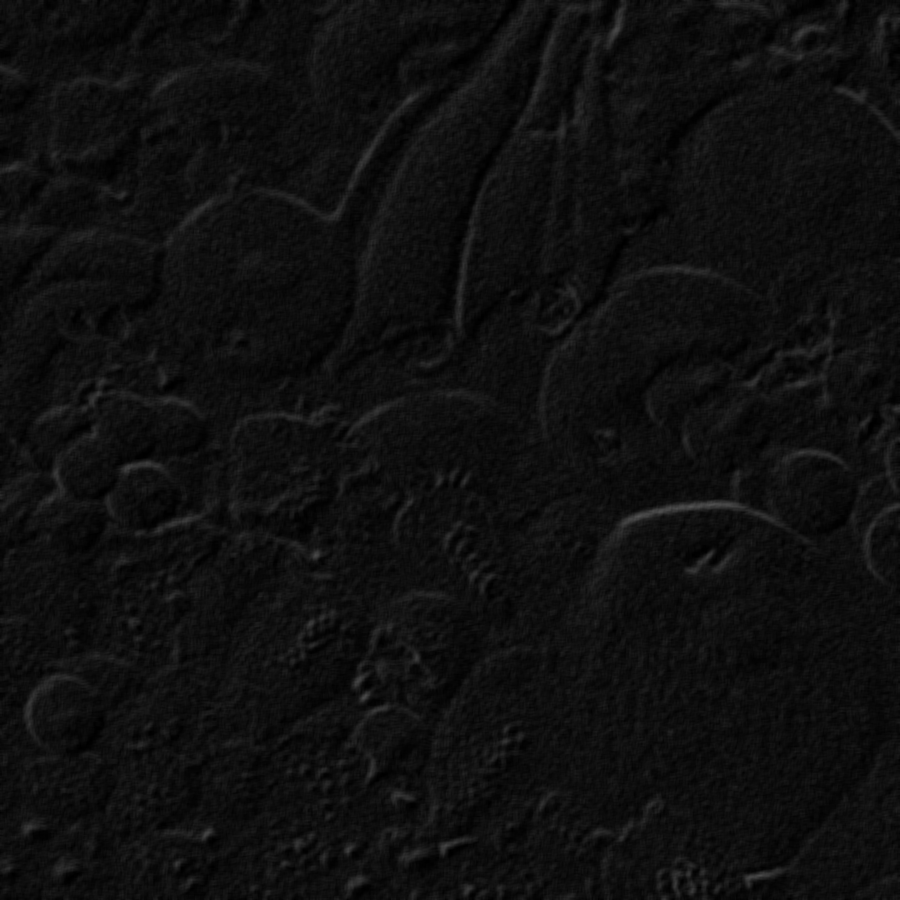

In [10]:
#smooth gradient

kernel = np.ones([5, 5]) / 25
smooth_gradient = cv2.filter2D(Sobel_gradient, ddepth=-1, kernel=kernel)
cv2_imshow(smooth_gradient)

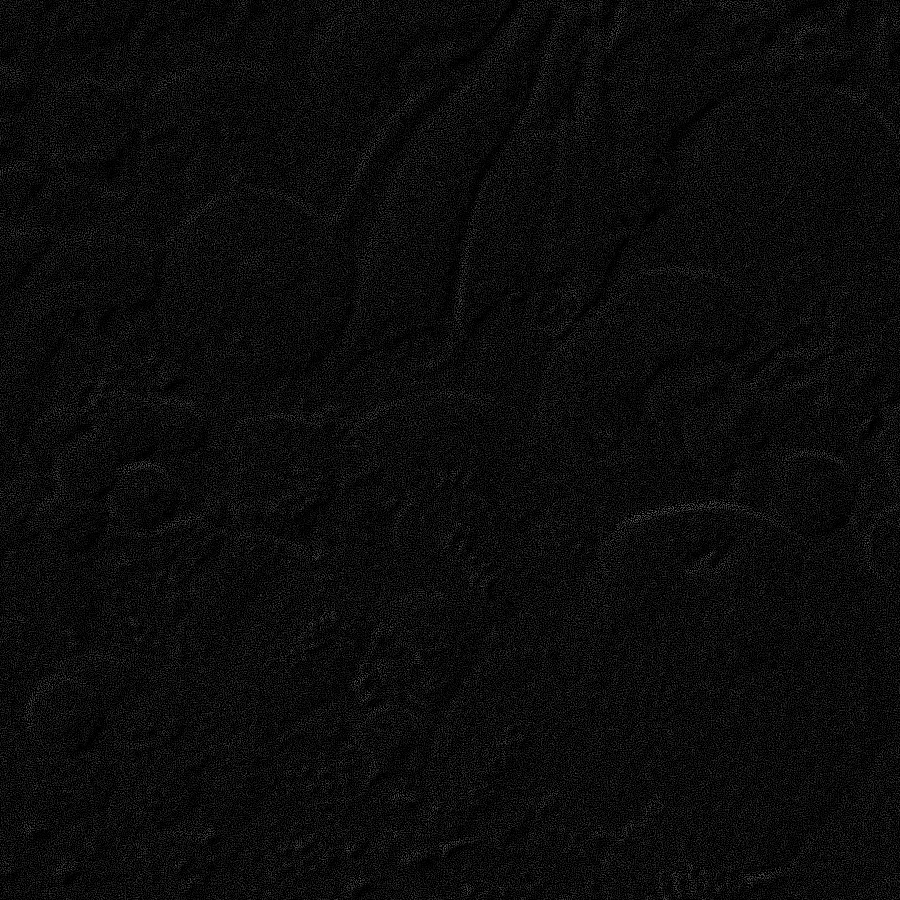

In [11]:
#extracted feature

extracted_feature = cv2.multiply(np.sqrt(smooth_gradient).astype(np.uint8),np.sqrt(Laplacian).astype(np.uint8))
cv2_imshow(extracted_feature)

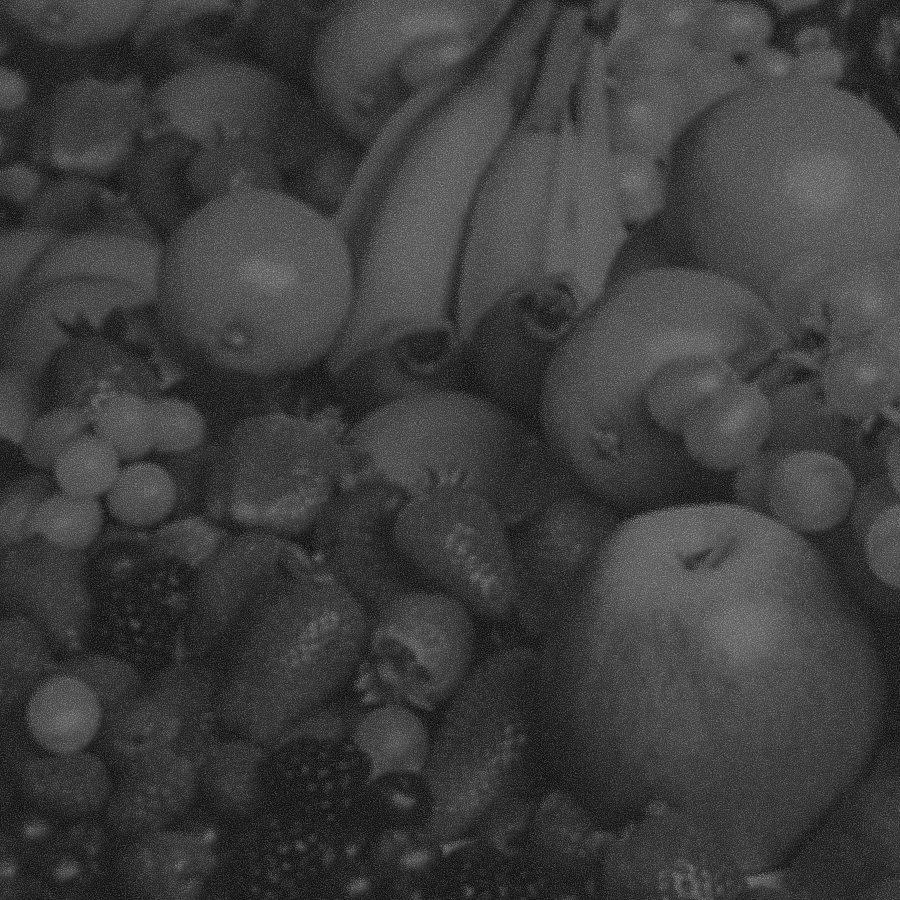

In [12]:
g = cv2.addWeighted(original, 0.5, extracted_feature,0.5,0)
cv2_imshow(g)

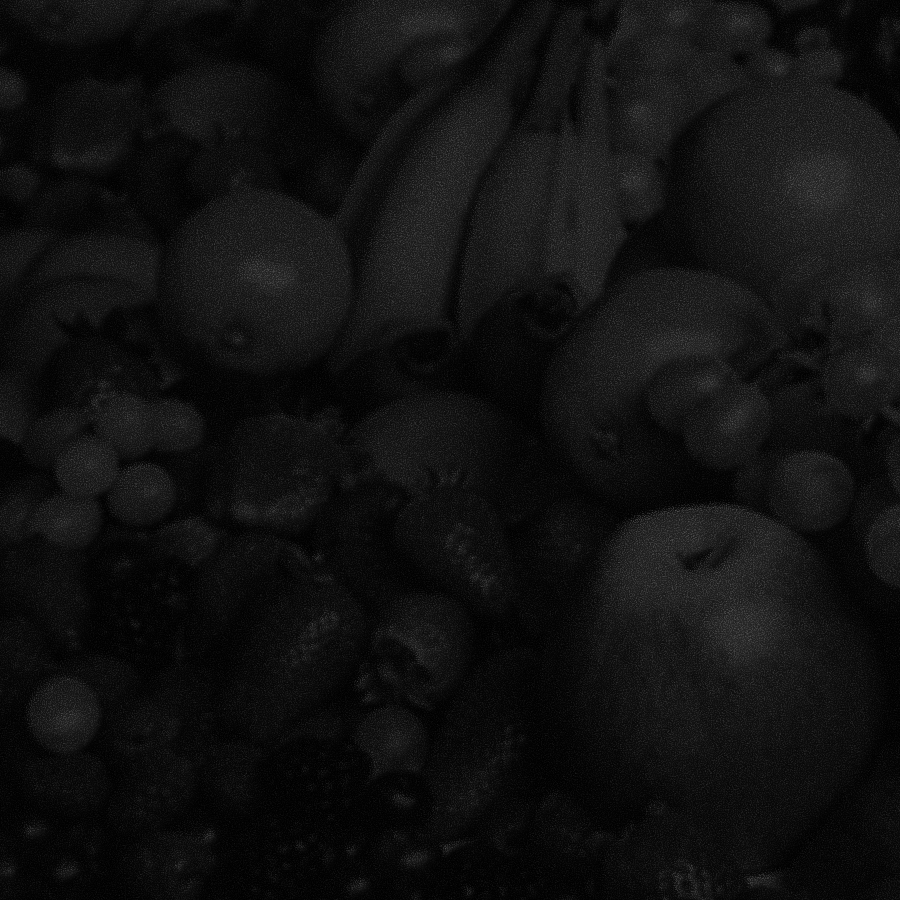

True

In [13]:
#power law
final = np.array(255*(g / 255) ** 2, dtype = 'uint8')
cv2_imshow(final)
cv2.imwrite('final.jpg', final)

In [14]:
def print_hist(img):
    img = img.flatten()
    img = img.tolist()
    myhist = []
    for i in range(0, 256):
        myhist.append(img.count(i))
    #plt.rcParams['font.sans-serif'] = ['SimHei']  # 用來顯示中文標籤
    # plt.rcParams['figure.dpi'] = 100 # 每英寸點數
    plt.figure()
    plt.bar(x=range(0, 256), height=myhist, width=0.5)
    plt.title('Histogram')
    plt.xlabel("Gray level")
    plt.ylabel("Number of pixels")
    plt.show()

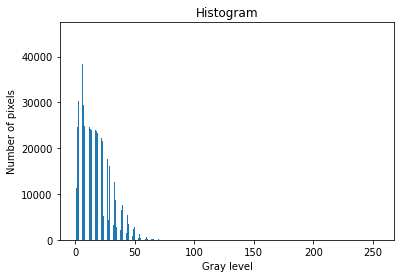

In [15]:
print_hist(final)